In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import pandas as pd
import findspark
from pyspark.sql.functions import *
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#os.environ["HADOOP_HOME"] = "C:\Hadoop-3.3.0"
#os.environ["JAVA_HOME"] = "C:\Java\jdk1.8.0_341"
findspark.add_packages('mysql:mysql-connector-java:8.0.23')

spark = SparkSession.builder.getOrCreate()
import tkinter as tk

In [7]:
import mysql.connector as mariadb
from mysql.connector import Error
try:
    connection = mariadb.connect(host='localhost',
                                         user='root',
                                         password='2107')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to SQL  version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("create database creditcard_capstone")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor = connection.cursor()
        sql_select_Query = "select * from offices"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query)

except Error as e:
    print("Error while connecting to Database", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("Database connection is closed")

Connected to SQL  version  5.5.5-10.9.1-MariaDB
Error while connecting to Database 1007 (HY000): Can't create database 'creditcard_capstone'; database exists
Database connection is closed


In [28]:
df_credit = spark.read.load("cdw_sapp_credit.json", format="json", header = 
True,inferSchema = True)
df_branch=spark.read.load("cdw_sapp_branch.json", format="json", header = 
True,inferSchema = True)
df_customer=spark.read.load("cdw_sapp_custmer.json", format="json", header = 
True,inferSchema = True)

In [265]:
df_credit.write.jdbc(url="jdbc:mysql://localhost:3306/creditcard_capstone"
                  "?user=root&password=2107",
              table="CDW_SAPP_CREDIT_CARD",
              mode="append",
              properties={"driver": 'com.mysql.jdbc.Driver'})

In [ ]:
df_branch.write.jdbc(url="jdbc:mysql://localhost:3306/creditcard_capstone"
                  "?user=root&password=2107",
              table="CDW_SAPP_BRANCH",
              mode="append",
              properties={"driver": 'com.mysql.jdbc.Driver'})

In [ ]:
df_customer.write.jdbc(url="jdbc:mysql://localhost:3306/creditcard_capstone"
                  "?user=root&password=2107",
              table="CDW_SAPP_CUSTOMER",
              mode="append",
              properties={"driver": 'com.mysql.jdbc.Driver'})

In [5]:
spark.read.format("jdbc").option("url", "jdbc:mysql://localhost:3306/creditcard_capstone"
                  "?user=root&password=2107").option("query", "SELECT * FROM cdw_sapp_credit_card").option("driver", "com.mysql.jdbc.Driver").load().createOrReplaceTempView("cdw_sapp_credit_card")
spark.read.format("jdbc").option("url", "jdbc:mysql://localhost:3306/creditcard_capstone"
                  "?user=root&password=2107").option("query", "SELECT * FROM cdw_sapp_customer").option("driver", "com.mysql.jdbc.Driver").load().createOrReplaceTempView("cdw_sapp_customer")
spark.read.format("jdbc").option("url", "jdbc:mysql://localhost:3306/creditcard_capstone"
                  "?user=root&password=2107").option("query", "SELECT * FROM cdw_sapp_branch").option("driver", "com.mysql.jdbc.Driver").load().createOrReplaceTempView("cdw_sapp_branch")

In [139]:
from tkinter import *
window = tk.Tk()
window.geometry("6000x500")
window.resizable(True, True)

    
#l=tk.Label(window, text=" ",fg="green")
#l.grid(row=8)
listbox = Listbox(window, height = 30,
				width = 25,
				bg = "grey",
				activestyle = 'dotbox',
				font = "Helvetica",
				fg = "yellow")
listbox.grid(row=8)
myscroll = tk.Scrollbar(window, orient='vertical', command=listbox.yview)

listbox.config(xscrollcommand=myscroll.set)



def task1():
    x=spark.sql("select TRANSACTION_TYPE FROM cdw_sapp_credit_card WHERE CUST_SSN IN (SELECT SSN FROM cdw_sapp_customer WHERE CUST_ZIP='{}') order by day desc ".format(e1.get()))
    x=x.toPandas().values.tolist()
    listbox.delete(0,END)
    listbox.insert(END, *x[0])
   
    

tk.Label(window, text="enter Zip code,month,year to get transactions made by customers").grid(row=0)
e1=tk.Entry(window)
e1.grid(row=0, column=1)
tk.Button(window, text="submit",command=task1).grid(row=0, column=3)

def task2():
    x=spark.sql("SELECT COUNT(*) AS TOTAL FROM cdw_sapp_credit_card WHERE TRANSACTION_TYPE='{}'".format(e2.get()))
    x=x.toPandas().values.tolist()
    listbox.delete(0,END)
    listbox.insert(END, *x[0])
  

tk.Label(window,text="Enter type to display the number and total values of transactions").grid(row=2)
e2=tk.Entry(window)
e2.grid(row=2, column=1)
tk.Button(window, text="submit",command=task2).grid(row=2, column=3)

def task3():
    x=spark.sql("SELECT COUNT(*)  FROM cdw_sapp_credit_card WHERE BRANCH_CODE IN (select BRANCH_CODE FROM cdw_sapp_branch WHERE BRANCH_STATE ='{}')".format(e3.get()))
    x=x.toPandas().values.tolist()
    listbox.delete(0,END)
    listbox.insert(END, *x[0])
   

tk.Label(window,text="Enter State  to display the number and total values of transactions").grid(row=3)
e3=tk.Entry(window)
e3.grid(row=3, column=1)
tk.Button(window, text="submit",command=task3).grid(row=3, column=3)

def task4():
    x=spark.sql("SELECT * FROM cdw_sapp_customer WHERE SSN='{}'".format(e4.get()))
    x=x.toPandas().values.tolist()
    listbox.delete(0,END)
    listbox.insert(END, *x[0])
tk.Label(window, text="Enter SSN to check the existing account details of a customer").grid(row=4)
e4=tk.Entry(window)
e4.grid(row=4, column=1)
tk.Button(window, text="submit",command=task4).grid(row=4, column=3)

def task5():
    #####
    x=x.toPandas().applymap(str)
    
    listbox.insert(END, *x)

tk.Label(window).grid(row=5)
e5=tk.Entry(window)
e5.grid(row=5, column=1)
tk.Button(window, text="submit",command=task5).grid(row=5, column=3)


def task6():
    x=bill=spark.sql(" SELECT CREDIT_CARD_NO, SUM(TRANSACTION_VALUE) AS bill FROM cdw_sapp_credit_card WHERE MONTH ='{}' AND YEAR='{}' GROUP BY CREDIT_CARD_NO".format(e6.get(),e61.get()))
    x=x.toPandas().values.tolist()
    listbox.delete(0,END)
    listbox.insert(END, *x[0])
    

tk.Label(window, text="enter month and year to to generate a monthly bill for a credit card number").grid(row=6)
e6=tk.Entry(window)
e6.grid(row=6, column=1)
e61=tk.Entry(window)
e61.grid(row=6, column=2)
tk.Button(window, text="submit",command=task6).grid(row=6, column=3)

def task7():
    x=spark.sql("SELECT TRANSACTION_TYPE FROM cdw_sapp_credit_card WHERE (DAY BETWEEN '{}' AND '{}') AND (MONTH BETWEEN '{}' AND '{}')".format(e7.get(),e71.get(),e72.get(),e73.get()))
    x=x.toPandas().values.tolist()
    listbox.delete(0,END)
    listbox.insert(END, *x[0])
   
   
tk.Label(window, text="Enter start day end day, then same for month to display the transactions made by a customer between two dates").grid(row=7)
e7=tk.Entry(window,width=10)
e7.grid(row=7, column=1)
e71=tk.Entry(window,width=10)
e71.grid(row=7, column=2)
e72=tk.Entry(window,width=10)
e72.grid(row=7, column=3)
e73=tk.Entry(window,width=10)
e73.grid(row=7, column=4)

tk.Button(window, text="submit",command=task7).grid(row=7, column=5)

window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\gabin ntankeu\appdata\local\programs\python\python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\gabin ntankeu\AppData\Local\Temp\ipykernel_24288\4286589412.py", line 25, in task1
    listbox.insert(END, *x[0])
  File "c:\users\gabin ntankeu\appdata\local\programs\python\python310\lib\site-packages\pyspark\sql\column.py", line 560, in __iter__
    raise TypeError("Column is not iterable")
TypeError: Column is not iterable
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\gabin ntankeu\appdata\local\programs\python\python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\gabin ntankeu\AppData\Local\Temp\ipykernel_24288\4286589412.py", line 25, in task1
    listbox.insert(END, *x[0])
  File "c:\users\gabin ntankeu\appdata\local\programs\python\python310\lib\site-packages\pyspark\

Text(0, 0.5, 'Total TRANSACTION')

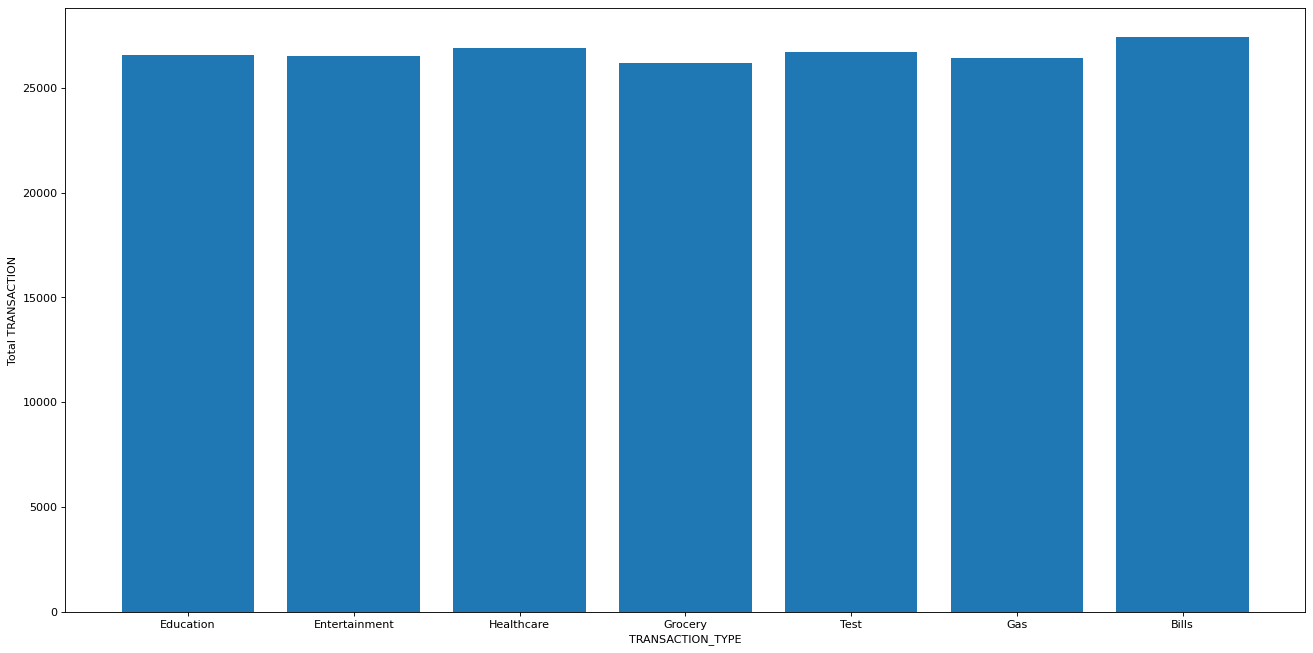

In [88]:

data=spark.sql("SELECT TRANSACTION_TYPE AS trans,count(TRANSACTION_TYPE) as total FROM cdw_sapp_credit_card group by TRANSACTION_TYPE")
data=data.toPandas()
figure(figsize = (20, 10), dpi = 80)
plt.bar(data["trans"],data["total"])
#plt.yticks(data["total"])
plt.xlabel('TRANSACTION_TYPE')
plt.ylabel('Total TRANSACTION')

Text(0, 0.5, 'Total')

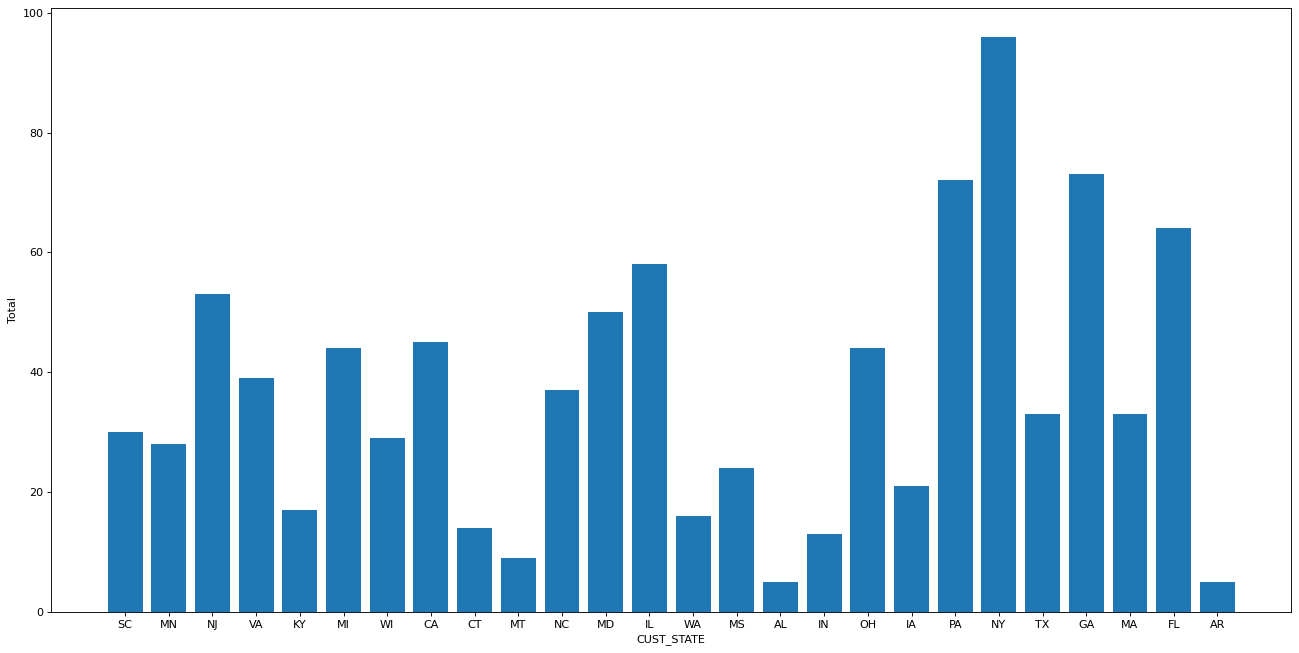

In [89]:
data=spark.sql("SELECT CUST_STATE as state,count(CUST_STATE) as total FROM cdw_sapp_customer group by CUST_STATE ")
data=data.toPandas()

figure(figsize = (20, 10), dpi = 80)
plt.bar(data["state"],data["total"])

plt.xlabel('CUST_STATE')
plt.ylabel('Total')

In [69]:
data=spark.sql("SELECT CUST_SSN AS ssn,sum(TRANSACTION_VALUE) AS total FROM cdw_sapp_credit_card GROUP by CUST_SSN ORDER BY TRANSACTION_VALUE ASC LIMIT 20")
data=data.toPandas()


figure(figsize = (20, 10), dpi = 80)

plt.bar(data["ssn"],data["total"])




AnalysisException: Column 'TRANSACTION_VALUE' does not exist. Did you mean one of the following? [ssn, total]; line 1 pos 108;
'GlobalLimit 20
+- 'LocalLimit 20
   +- 'Sort ['TRANSACTION_VALUE ASC NULLS FIRST], true
      +- Aggregate [CUST_SSN#67L], [CUST_SSN#67L AS ssn#599L, sum(TRANSACTION_VALUE#72) AS total#600]
         +- SubqueryAlias cdw_sapp_credit_card
            +- View (`cdw_sapp_credit_card`, [BRANCH_CODE#65L,CREDIT_CARD_NO#66,CUST_SSN#67L,DAY#68L,MONTH#69L,TRANSACTION_ID#70L,TRANSACTION_TYPE#71,TRANSACTION_VALUE#72,YEAR#73L])
               +- Relation [BRANCH_CODE#65L,CREDIT_CARD_NO#66,CUST_SSN#67L,DAY#68L,MONTH#69L,TRANSACTION_ID#70L,TRANSACTION_TYPE#71,TRANSACTION_VALUE#72,YEAR#73L] JDBCRelation((SELECT * FROM cdw_sapp_credit_card) SPARK_GEN_SUBQ_8) [numPartitions=1]


Text(0, 0.5, 'Total')

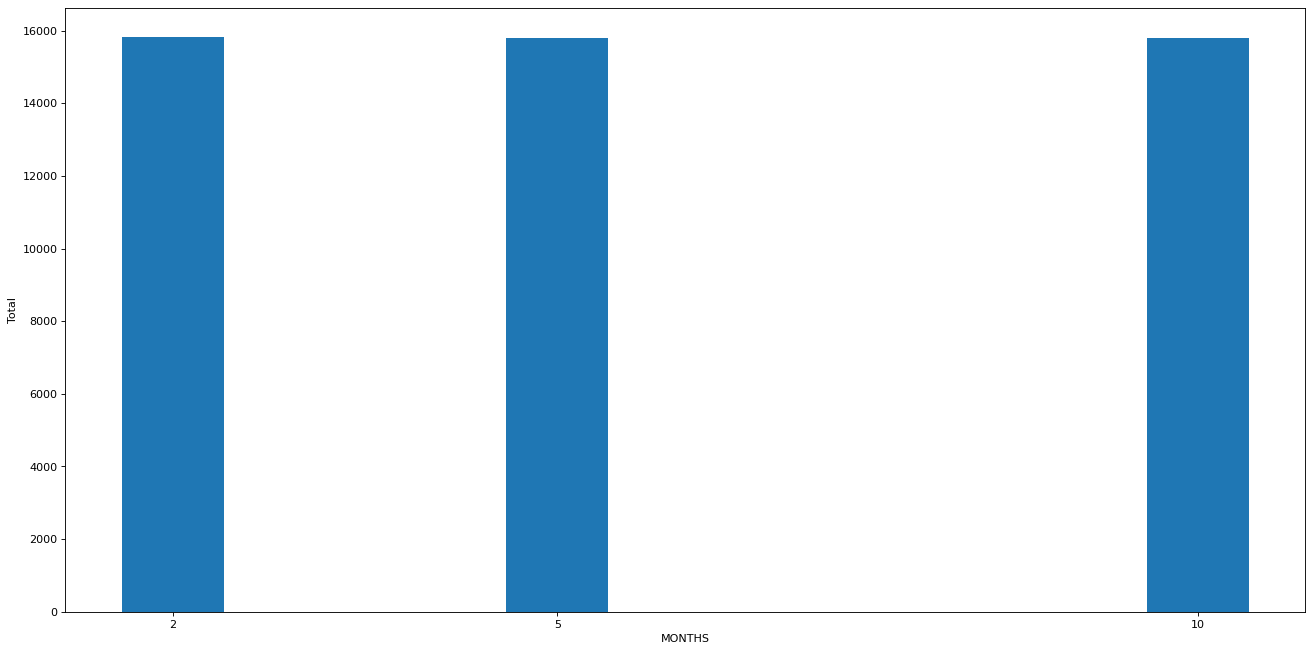

In [90]:
data=spark.sql("select month as months, COUNT(TRANSACTION_ID) as total  from cdw_sapp_credit_card group by month order by total desc limit 3")
data=data.toPandas()

figure(figsize = (20,10 ), dpi = 80)
plt.bar(data["months"],data["total"])
plt.xticks(data["months"])
#plt.yticks(data["total"])

plt.xlabel('MONTHS')
plt.ylabel('Total')



Text(0, 0.5, 'TRANSACTION_VALUE')

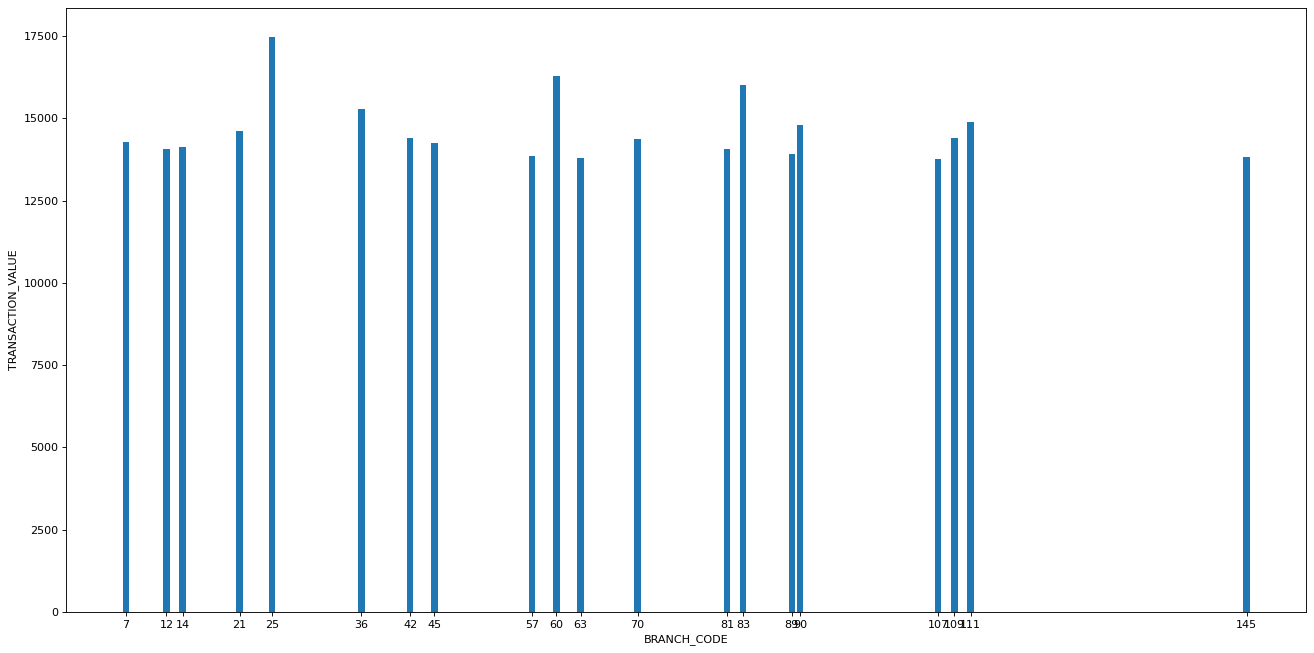

In [92]:
data=spark.sql("SELECT BRANCH_CODE AS branch,sum(TRANSACTION_VALUE) as total FROM cdw_sapp_credit_card WHERE TRANSACTION_TYPE ='Healthcare' group BY BRANCH_CODE order by total desc")
data=data.toPandas().head(20)

figure(figsize = (20, 10), dpi = 80)

plt.bar(data["branch"],data["total"])

plt.xticks(data["branch"])
#plt.yticks(yi,y)

plt.xlabel('BRANCH_CODE')
plt.ylabel('TRANSACTION_VALUE')

In [2]:
import requests
x=requests.get("https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json")
print(x.status_code)
x=x.json()
data=spark.createDataFrame(x)

data.write.jdbc(url="jdbc:mysql://localhost:3306/creditcard_capstone"
                  "?user=root&password=2107",
              table="cdw_sapp_loan_application",
              mode="append",
              properties={"driver": 'com.mysql.jdbc.Driver'})
spark.read.format("jdbc").option("url", "jdbc:mysql://localhost:3306/creditcard_capstone"
                  "?user=root&password=2107").option("query", "SELECT * FROM cdw_sapp_loan_application").option("driver", "com.mysql.jdbc.Driver").load().createOrReplaceTempView("cdw_sapp_loan_application")

200


In [78]:
data=spark.sql("SELECT concat(gender,' ( ', Application_Status,' )')as gndr,COUNT(GENDER) AS total FROM cdw_sapp_loan_application where MARRIED='Yes' GROUP BY GENDER, INCOME")
data=data.toPandas()


figure(figsize = (20, 10), dpi = 80)

plt.bar(data["gndr"],data["total"])

plt.grid(linestyle = '--')

AnalysisException: expression 'cdw_sapp_loan_application.Application_Status' is neither present in the group by, nor is it an aggregate function. Add to group by or wrap in first() (or first_value) if you don't care which value you get.;
Aggregate [GENDER#46, INCOME#47], [concat(gender#46,  ( , Application_Status#42,  )) AS gndr#674, count(GENDER#46) AS total#675L]
+- Filter (MARRIED#48 = Yes)
   +- SubqueryAlias cdw_sapp_loan_application
      +- View (`cdw_sapp_loan_application`, [Application_ID#41,Application_Status#42,Credit_History#43L,Dependents#44,Education#45,Gender#46,Income#47,Married#48,Property_Area#49,Self_Employed#50])
         +- Relation [Application_ID#41,Application_Status#42,Credit_History#43L,Dependents#44,Education#45,Gender#46,Income#47,Married#48,Property_Area#49,Self_Employed#50] JDBCRelation((SELECT * FROM cdw_sapp_loan_application) SPARK_GEN_SUBQ_0) [numPartitions=1]


In [87]:
data=spark.sql("select COUNT(gender) AS total, concat(gender,' ( ', Application_Status,' )') as gende FROM cdw_sapp_loan_application  GROUP BY gender,Property_Area ")
data=data.toPandas()

figure(figsize = (20, 6), dpi = 80)

plt.bar(data["gende"],data["total"])


AnalysisException: grouping expressions sequence is empty, and 'cdw_sapp_loan_application.gender' is not an aggregate function. Wrap '(count(cdw_sapp_loan_application.gender) AS `count(gender)`)' in windowing function(s) or wrap 'cdw_sapp_loan_application.gender' in first() (or first_value) if you don't care which value you get.;
Aggregate [count(gender#46) AS count(gender)#727L, concat(gender#46,  ( , Application_Status#42,  )) AS gende#725]
+- SubqueryAlias cdw_sapp_loan_application
   +- View (`cdw_sapp_loan_application`, [Application_ID#41,Application_Status#42,Credit_History#43L,Dependents#44,Education#45,Gender#46,Income#47,Married#48,Property_Area#49,Self_Employed#50])
      +- Relation [Application_ID#41,Application_Status#42,Credit_History#43L,Dependents#44,Education#45,Gender#46,Income#47,Married#48,Property_Area#49,Self_Employed#50] JDBCRelation((SELECT * FROM cdw_sapp_loan_application) SPARK_GEN_SUBQ_0) [numPartitions=1]


Text(0, 0.5, 'TOTAL')

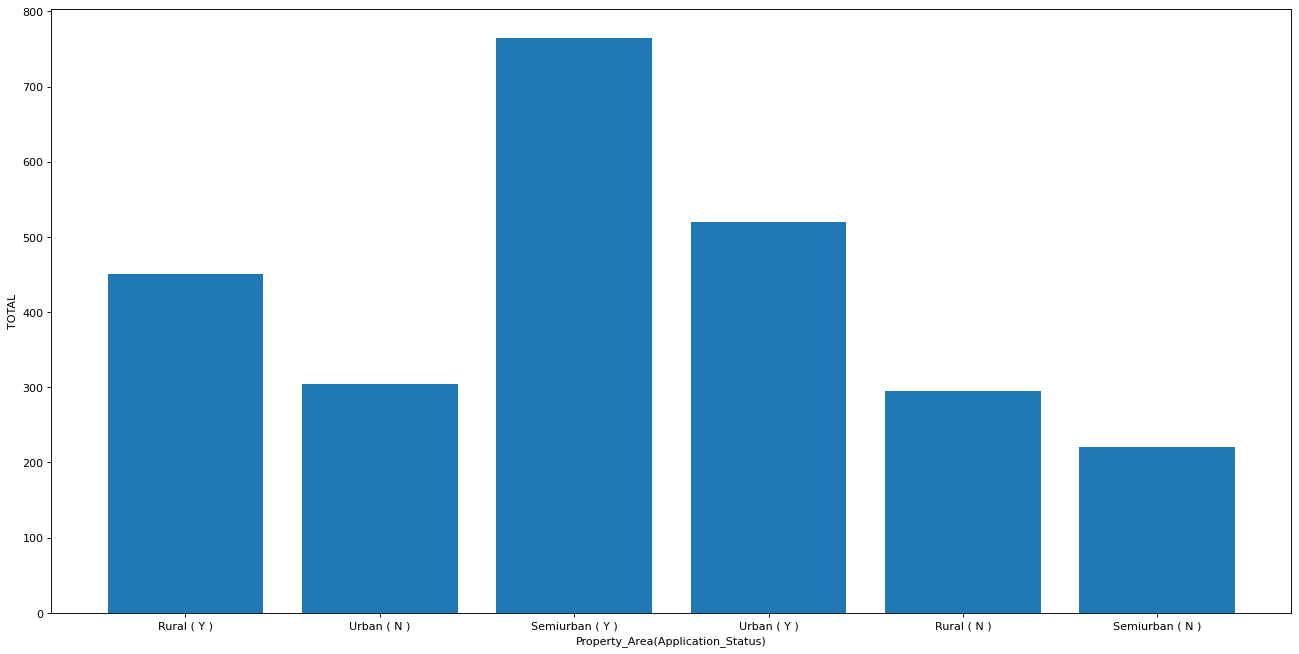

In [93]:
data=spark.sql("SELECT COUNT(Application_Status) as total, concat(Property_Area,' ( ',Application_Status,' )') as status FROM cdw_sapp_loan_application  GROUP BY Property_Area,Application_Status")
data=data.toPandas()

figure(figsize = (20, 10), dpi = 80)

plt.bar(data["status"],data["total"])

plt.xlabel('Property_Area(Application_Status)')
plt.ylabel("TOTAL")
